
# Sales Prediction Using Python

### Author: Mominur Rahman  
Date: 01-11-2022  
Version: 1.0  

**Portfolio**: https://mominur.dev/

**GitHub Repository**: https://github.com/mominurr/Sales-Prediction-Using-Python

**LinkedIn**: https://www.linkedin.com/in/mominur-rahman-145461203/

---

### Project Overview:
This project utilizes Python to predict sales based on advertisement budgets allocated to TV, Radio, and Newspaper.  
The main tasks involve:
1. **Data Visualization**: Understanding relationships between features.
2. **Model Training**: Using Linear Regression for sales prediction.
3. **Model Evaluation**: Assessing the prediction quality.

---



## Importing Necessary Libraries

We begin by importing all required libraries for data manipulation, visualization, and modeling.


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib


## Loading the dataset

In [2]:
# Load the dataset
df = pd.read_csv("Advertising.csv")

## Displaying the dataset first few rows for better understanding

In [3]:
# Display basic dataset information
print("\nFirst 10 rows of the dataset: \n")
print(df.head(10))


First 10 rows of the dataset: 

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
5           6    8.7   48.9       75.0    7.2
6           7   57.5   32.8       23.5   11.8
7           8  120.2   19.6       11.6   13.2
8           9    8.6    2.1        1.0    4.8
9          10  199.8    2.6       21.2   10.6


## Shape of the dataset

In [5]:
print(df.shape)

(200, 5)


## Data types of the dataset

In [6]:
print(df.dtypes)

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object


## Information about the dataset

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


## Removing Unnecessary Columns

In [8]:
# remove unnecessary columns
df.drop(['Unnamed: 0'], axis=1, inplace=True)

## After removing the unnecessary columns. First 5 rows of the dataset

In [9]:
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Null or missing values in the dataset

In [10]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## Describing the dataset

In [11]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000



## Data Visualization

This function is responsible for exploring relationships between features (TV, Radio, Newspaper) and the target variable (Sales).  
It uses pair plots and heatmaps to provide insights into the dataset.


 **Visualize the relationship between the features and the target using a heatmap**

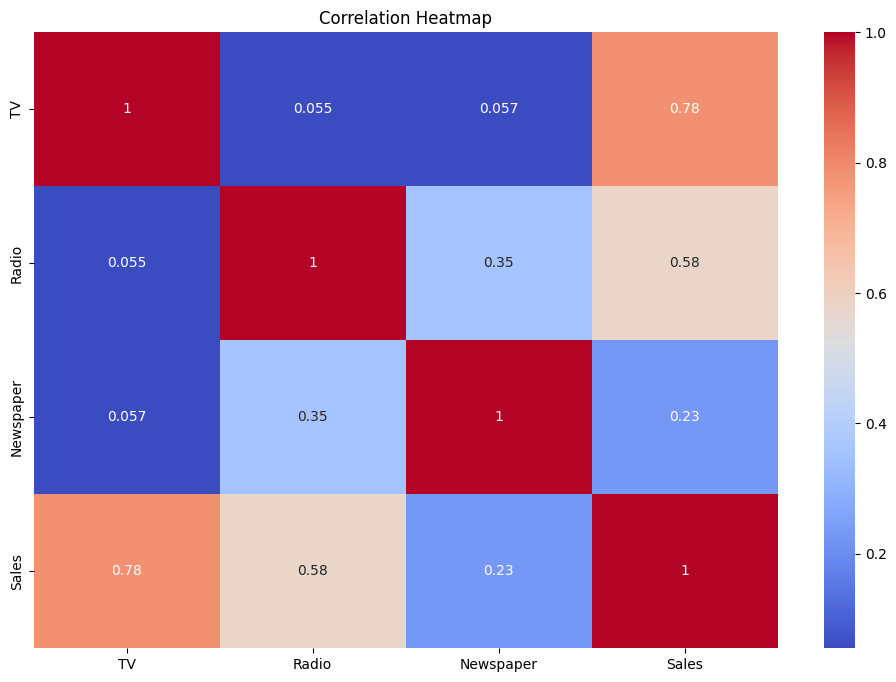

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('heatmap.png')
plt.show()

**Visualize the relationship between the features and the target**

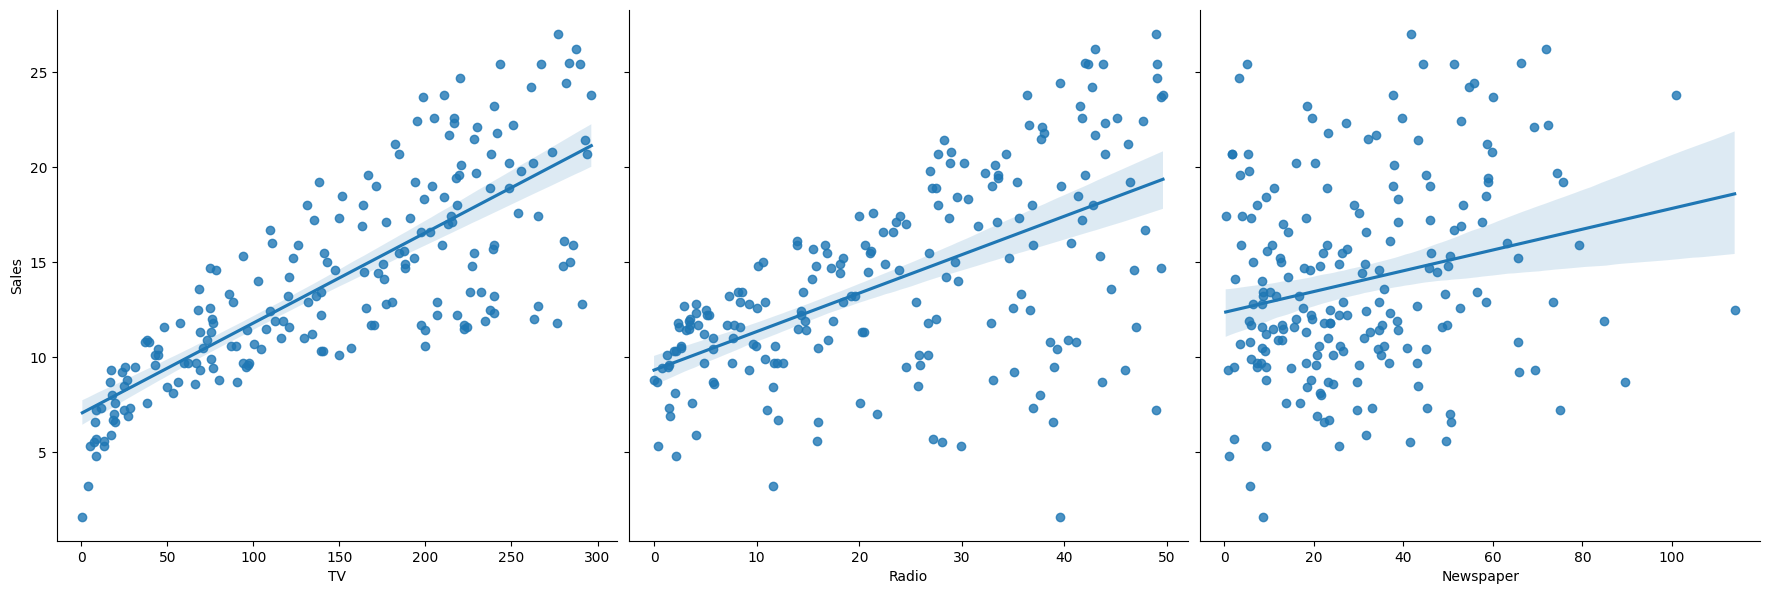

In [13]:

# Visualize the relationship between the features and the target
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=6, kind='reg')
plt.savefig('pairplot.png')
plt.show()

## Splitting Data for Training and Testing

We will split the data into training and testing sets. We will use 80% of the data for training and 20% for testing.


In [14]:
# Split the dataset into training and testing sets. Here we will use 80% of the data for training and 20% for testing.
X = df.drop('Sales', axis=1).values
y = df['Sales'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training the Linear Regression Model


In [15]:
# Create a linear regression model and fit it to the training data.
MODEL = LinearRegression()
MODEL.fit(X_train, y_train)

LinearRegression()

## Evaluating Model Performance

In [16]:
y_pred = MODEL.predict(X_test)

# Evaluate the model using the testing data
MSE = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)

**Displying the model evaluation result and regression line using matplotlib**

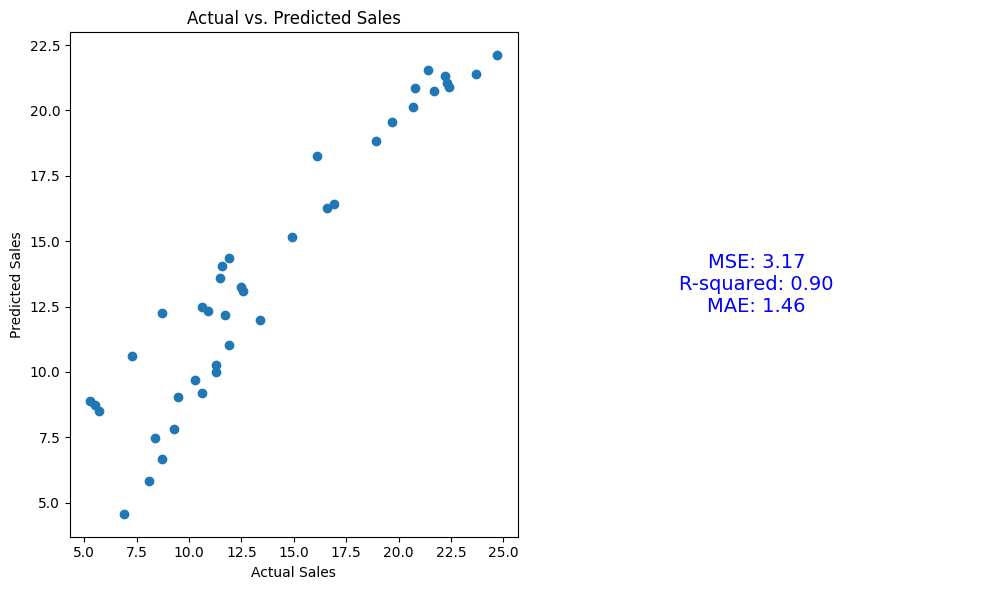

In [17]:
# show the model evaluation result and regression line using matplotlib
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Subplot 1: Scatter plot with regression line
ax1.scatter(y_test, y_pred)
ax1.set_title('Actual vs. Predicted Sales')
ax1.set_xlabel('Actual Sales')
ax1.set_ylabel('Predicted Sales')

# Subplot 2: Metrics
metrics_text = f'MSE: {MSE:.2f}\nR-squared: {R2:.2f}\nMAE: {MAE:.2f}'
ax2.text(0.5, 0.5, metrics_text, verticalalignment='center', horizontalalignment='center', color='blue', fontsize=14)
ax2.axis('off')
plt.tight_layout()
plt.savefig('model-evaluation-report.png')
plt.show()


## Save the model to Predict Sales 

In [18]:
# Save the model
joblib.dump(MODEL, 'sales-predictor.pkl')   

['sales-predictor.pkl']

## Flask Web Application for Sales Prediction

This Flask application serves as a user interface for predicting sales based on user inputs for advertisement budgets. The model trained and saved in this notebook (`sales-predictor.pkl`) is deployed through the Flask application.

---

### Features:
1. Accepts user inputs for TV, Radio, and Newspaper advertisement budgets via a web form.
2. Utilizes the pre-trained sales prediction model (`sales-predictor.pkl`) saved from this notebook.
3. Predicts sales and dynamically displays the result on the same page.

---

### Deployment Instructions:
To deploy the application, follow these steps:

1. **Ensure the model file exists**:
   - Verify that `sales-predictor.pkl` is saved in the same directory as your Flask application file (`app.py`).

2. **Run the Flask Application**:
   - Execute the following command in your terminal to start the Flask app:
     ```bash
     python app.py
     ```

3. **Access the Application**:
   - Open a browser and go to `http://127.0.0.1:5000`.

4. **Provide Inputs**:
   - Enter values for TV, Radio, and Newspaper budgets in the input form.

5. **View Results**:
   - Submit the form to see the predicted sales.

---

### Example Workflow:
1. **Input Example**:
   - TV: `200`
   - Radio: `40`
   - Newspaper: `50`

2. **Output**:
   - Predicted Sales: `19.631 units`.

---

